In [1]:
import random
import numpy as np
from simple_grad.engine import Value
from simple_grad.network import Layer, Network
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(402)
random.seed(402)


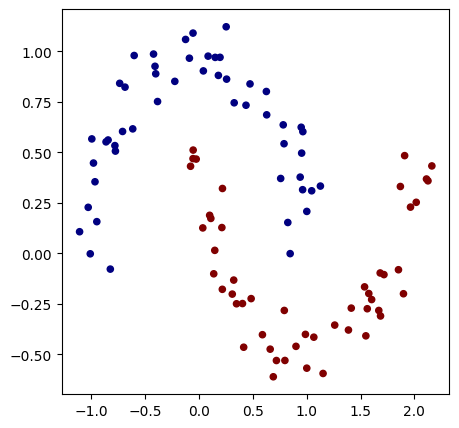

In [3]:
from sklearn.datasets import make_moons, make_blobs
x, y = make_moons(n_samples=100, noise=0.1)


y = y*2 - 1 

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet')


In [4]:
model = Network()
model.add_layer(2,16,'relu')
model.add_layer(16,16,'relu')
model.add_layer(16,16, 'relu')
model.add_layer(16,1)



In [5]:
def loss(batch_size=None):
    
    if batch_size is None:
        Xb, yb = x, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    scores = list(map(model, inputs))
    
    losses = [(1 + -yi*scorei[0]).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    print(data_loss,reg_loss)
    
    accuracy = [(yi > 0) == (scorei[0].data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)


Value(data=0.34682759853715067, grad=0) Value(data=0.01714996574235249, grad=0)
Value(data=0.3639775642795032, grad=0) 0.85


In [6]:
for k in range(100):
    
    total_loss, acc = loss()
    model.zero_grad()
    total_loss.backprop()
    
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

Value(data=0.34682759853715067, grad=0) Value(data=0.01714996574235249, grad=0)
step 0 loss 0.3639775642795032, accuracy 85.0%
Value(data=2.672835056934844, grad=0) Value(data=0.017490468010569186, grad=0)
step 1 loss 2.690325524945413, accuracy 50.0%
Value(data=6.760502728714431, grad=0) Value(data=0.02186456349288734, grad=0)
step 2 loss 6.782367292207318, accuracy 50.0%
Value(data=3.661169975804891, grad=0) Value(data=0.023913069665456654, grad=0)
step 3 loss 3.6850830454703476, accuracy 50.0%
Value(data=3.5789536654918424, grad=0) Value(data=0.025858331195686396, grad=0)
step 4 loss 3.6048119966875287, accuracy 50.0%
Value(data=1.2084584567659156, grad=0) Value(data=0.025417977102942534, grad=0)
step 5 loss 1.2338764338688581, accuracy 50.0%
Value(data=1.543008027091372, grad=0) Value(data=0.026055917328223103, grad=0)
step 6 loss 1.569063944419595, accuracy 50.0%
Value(data=0.6398134363589675, grad=0) Value(data=0.025602931709084613, grad=0)
step 7 loss 0.665416368068052, accuracy

(-1.6105705591280801, 1.8894294408719199)

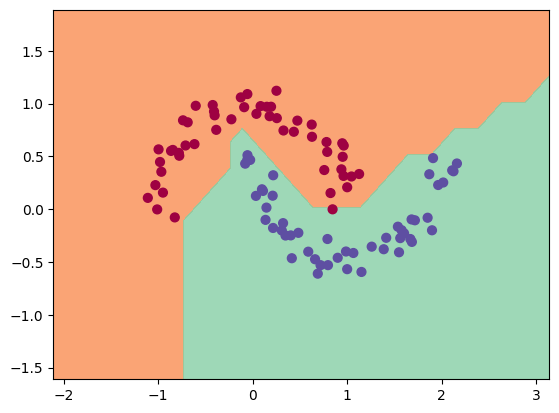

In [7]:
# This cell is copied from Andrej Karpathy's micrograd repo, which, in fact, inspired this project
h = 0.25
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [8]:
#Checking the upper and lower bounds of the parameters. The regularization seems to have worked well.
maxi=-10999
mini=109999
for p in model.parameters():
    maxi = p.data if p.data>maxi else maxi
    mini = p.data if p.data<mini else mini
print(maxi, mini)

for i, layer in enumerate(model.layers):
    print("Layer ",i)
    maxi=-10999
    mini=109999
    for p in layer.parameters():
        maxi = p.data if p.data>maxi else maxi
        mini = p.data if p.data<mini else mini
    print(maxi, mini)



2.3097801501935167 -2.691560418790915
Layer  0
1.5129494013731941 -1.8854949152230231
Layer  1
2.3097801501935167 -1.7788120846613469
Layer  2
1.4584557014600479 -2.691560418790915
Layer  3
1.0193198557408432 -1.5113849764714264
